# **Stock Market Prediction And Forecasting Using Stacked LSTM**

In [36]:
# Data Collection
import pandas_datareader as pdr
key="136f7caa5eca1a2adc0ec500e984f01f87bb55c9"   # tiingo api key for stock price 
import pandas as pd
import os
import numpy as np

In [37]:
df = pd.read_csv('/content/drive/MyDrive/projects/LSTM - Stock-Market-Forecasting/AAPL.csv')   # AAPL.csv file contains apple company stock data

In [38]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [39]:
df.to_csv('AAPL.csv')

In [40]:
df.head()

close      high     low    open    volume  \
symbol date                                                                    
AAPL   2017-08-10 00:00:00+00:00  155.32  160.0000  154.63  159.90  39081017   
       2017-08-11 00:00:00+00:00  157.48  158.5728  156.07  156.60  25943187   
       2017-08-14 00:00:00+00:00  159.85  160.2100  158.75  159.32  21754810   
       2017-08-15 00:00:00+00:00  161.60  162.1950  160.14  160.66  27936774   
       2017-08-16 00:00:00+00:00  160.95  162.5100  160.15  161.94  27321761   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2017-08-10 00:00:00+00:00  36.850189  37.960535  36.686484  37.936810   
       2017-08-11 00:00:00+00:00  37.362656  37.621927  37.028129  37.153874   
       2017-08-14 00:00:00+00:00  37.924947  38.010358  37.663968  37.799203   
       2017-08-15 00:00:00+00:00  38.340140  38.481306  37.993750  38.117122   
       2017-08-16 00:00:00+00:00  38.185926  38.556041  37.996123  38.420806   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2017-08-10 00:00:00+00:00  156324068     0.63          1.0  
       2017-08-11 00:00:00+00:00  103772748     0.00          1.0  
       2017-08-14 00:00:00+00:00   87019240     0.00          1.0  
       2017-08-15 00:00:00+00:00  111747096     0.00          1.0  
       2017-08-16 00:00:00+00:00  109287044     0.00          1.0

In [41]:
df.tail()

close    high     low     open    volume  \
symbol date                                                                   
AAPL   2022-08-02 00:00:00+00:00  160.01  162.41  159.63  160.100  59907025   
       2022-08-03 00:00:00+00:00  166.13  166.59  160.75  160.840  82507488   
       2022-08-04 00:00:00+00:00  165.81  167.19  164.43  166.005  55474144   
       2022-08-05 00:00:00+00:00  165.35  165.85  163.00  163.210  56696985   
       2022-08-08 00:00:00+00:00  164.87  167.81  164.20  166.370  60362338   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
AAPL   2022-08-02 00:00:00+00:00  159.787737  162.184403  159.408265   
       2022-08-03 00:00:00+00:00  165.899236  166.358597  160.526709   
       2022-08-04 00:00:00+00:00  165.579681  166.957764  164.201597   
       2022-08-05 00:00:00+00:00  165.350000  165.850000  163.000000   
       2022-08-08 00:00:00+00:00  164.870000  167.810000  164.200000   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
AAPL   2022-08-02 00:00:00+00:00  159.877612   59907025     0.00          1.0  
       2022-08-03 00:00:00+00:00  160.616584   82507488     0.00          1.0  
       2022-08-04 00:00:00+00:00  165.774410   55474144     0.00          1.0  
       2022-08-05 00:00:00+00:00  163.210000   56696985     0.23          1.0  
       2022-08-08 00:00:00+00:00  166.370000   60362338     0.00          1.0

In [42]:
df1=df.reset_index()['close']  # working with close column from our datazset

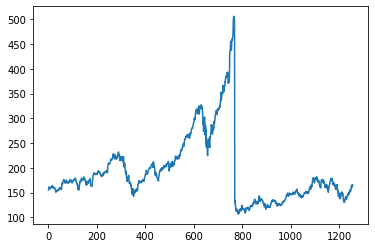

In [43]:
# plot

import matplotlib.pyplot as plt
plt.plot(df1)

In [44]:
df1

0       155.32
1       157.48
2       159.85
3       161.60
4       160.95
         ...  
1252    160.01
1253    166.13
1254    165.81
1255    165.35
1256    164.87
Name: close, Length: 1257, dtype: float64

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [46]:
print(df1)

[[0.12142768]
 [0.12683782]
 [0.13277395]
 ...
 [0.14770194]
 [0.14654978]
 [0.14534753]]


In [47]:
# splitting dataset into train and test split

# splitting dataset 65% for training and 35% for testing

training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [48]:
training_size,test_size

(817, 440)

In [49]:
train_data

array([[1.21427677e-01],
       [1.26837821e-01],
       [1.32773951e-01],
       [1.37157170e-01],
       [1.35529117e-01],
       [1.27789606e-01],
       [1.26887915e-01],
       [1.26161553e-01],
       [1.32598622e-01],
       [1.33099562e-01],
       [1.31321227e-01],
       [1.32798998e-01],
       [1.36831559e-01],
       [1.40438322e-01],
       [1.41540388e-01],
       [1.43168441e-01],
       [1.43293676e-01],
       [1.38359424e-01],
       [1.37933626e-01],
       [1.36305573e-01],
       [1.29718222e-01],
       [1.36906700e-01],
       [1.35303694e-01],
       [1.32273012e-01],
       [1.28841578e-01],
       [1.32849092e-01],
       [1.29818410e-01],
       [1.29968691e-01],
       [1.23306199e-01],
       [1.16593613e-01],
       [1.12836569e-01],
       [1.09480276e-01],
       [1.15967439e-01],
       [1.18697558e-01],
       [1.16318096e-01],
       [1.18422041e-01],
       [1.17645585e-01],
       [1.19323732e-01],
       [1.16819036e-01],
       [1.21603006e-01],


In [50]:
# convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
 
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [51]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [52]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [53]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [54]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [55]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [58]:
# training model

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 332ms/step - loss: 0.0311 - val_loss: 8.6767e-04
Epoch 2/100
12/12 [==============================] - 4s 343ms/step - loss: 0.0122 - val_loss: 0.0019
Epoch 3/100
12/12 [==============================] - 4s 347ms/step - loss: 0.0093 - val_loss: 4.8540e-04
Epoch 4/100
12/12 [==============================] - 4s 326ms/step - loss: 0.0083 - val_loss: 3.1237e-04
Epoch 5/100
12/12 [==============================] - 5s 405ms/step - loss: 0.0075 - val_loss: 8.9293e-04
Epoch 6/100
12/12 [==============================] - 5s 425ms/step - loss: 0.0075 - val_loss: 8.9100e-04
Epoch 7/100
12/12 [==============================] - 5s 406ms/step - loss: 0.0062 - val_loss: 2.5083e-04
Epoch 8/100
12/12 [==============================] - 5s 407ms/step - loss: 0.0059 - val_loss: 5.4924e-04
Epoch 9/100
12/12 [==============================] - 4s 342ms/step - loss: 0.0065 - val_loss: 4.6654e-04
Epoch 10/100
12/12 [==============================] - 5s 40

In [59]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [60]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [61]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

244.15142994633203

In [62]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

159.72444975134724

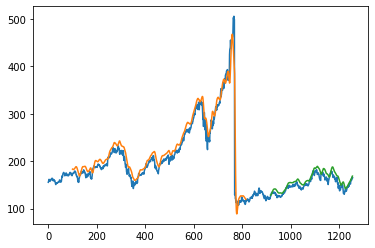

In [63]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [64]:
len(test_data)

440

In [65]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [66]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [67]:
temp_input

[0.13470256731371316,
 0.14311834690043823,
 0.14662492172824038,
 0.1552410770194113,
 0.1587226048841578,
 0.16839073262366933,
 0.17001878522229175,
 0.17222291797119593,
 0.18063869755792106,
 0.1776581089542893,
 0.16974326862867878,
 0.16899185973700687,
 0.1793362554790231,
 0.17087038196618654,
 0.16278021289918598,
 0.1635566687539135,
 0.158422041327489,
 0.14755165936130238,
 0.1523356293049467,
 0.15919849718221663,
 0.14639949906073885,
 0.1458484658735128,
 0.15168440826549778,
 0.15125860989355033,
 0.14922980588603624,
 0.13763306199123349,
 0.140363180964308,
 0.1251346274264245,
 0.12455854727614268,
 0.14226675015654344,
 0.12726361928616153,
 0.12804007514088916,
 0.13184721352536,
 0.14822792736380713,
 0.12505948653725735,
 0.12633688165309953,
 0.11326236693800873,
 0.11939887288666245,
 0.09933625547902314,
 0.08946775203506574,
 0.10086412022542268,
 0.09693174702567309,
 0.10619912335629306,
 0.08510958046336875,
 0.0764182842830306,
 0.07701941139636814,
 0.0

In [68]:
# demonstrate prediction for next 10 days
from numpy import array

# logic for predicting next 10 days

# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)